In [1]:
import pandas as pd
import napari
from skimage.data import cells3d,astronaut 
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\User\Downloads\larose6\larose_point_cloud_base_deleted.txt", sep=" ")

In [17]:
# Fonctions pour la visualisation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm

tous_les_couleurs = list(mcolors.CSS4_COLORS.keys())
print('Total couleur: ',len(tous_les_couleurs))
dico_tous_les_couleurs = {}
for ix in range(len(tous_les_couleurs)):
    dico_tous_les_couleurs[ix] = tous_les_couleurs[ix]
    
def kmeans_processing(projections,current_data,dico_tous_les_couleurs,maximum_range_=20,see_latent_space=False):
    
    kmeans_set = [0,0]
    kmeans_list_fit = ['x','x']
    x_abscisse = range(2,maximum_range_+1)
    print(f'Research interval : {2}-{maximum_range_}')
    for i in tqdm(x_abscisse,desc="Calinski-Harabasz score "):
        kmeans_ch = KMeans(n_clusters=i, random_state=1).fit(projections)
        labels = kmeans_ch.labels_
        kmeans_set.append(calinski_harabasz_score(projections,labels))
        kmeans_list_fit.append(kmeans_ch)
    
    kmeans_set_plot = kmeans_set[2:]
    plt.plot(x_abscisse,kmeans_set_plot)
    plt.title("Cluster number")
    plt.xlabel("nbr cluster")
    plt.ylabel("Calinski-Harabasz score")
    print('optimal cluster: ',np.argmax(kmeans_set))
    nbr_cluster = np.argmax(kmeans_set)
    
    # model = KMeans(n_clusters = nbr_cluster,init = 'k-means++')
    # model.fit(projections)
    model = kmeans_list_fit[nbr_cluster]
    y_clusters_tsne = model.fit_predict(projections)

    color_name_set = []
    for ix in y_clusters_tsne:
        nbr = y_clusters_tsne[ix]
        color_name_set.append(dico_tous_les_couleurs[nbr])

    viewer = napari.Viewer(ndisplay=3)

    if see_latent_space:
        #Color label in latent space
        points_layer = viewer.add_points(
            projections,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
        )
    else:
        #Color label in raw data
        points_layer = viewer.add_points(
            current_data,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
        )
    return color_name_set,model
        
def HCA_processing(projections,current_data,dico_tous_les_couleurs,maximum_range_,see_latent_space=False):
       
    clf_set = [0,0]
    clf_list_fit = ['x','x']
    x_abscisse = range(2,maximum_range_+1)
    print(f'Research interval : {2}-{maximum_range_}')
    for i in tqdm(x_abscisse,desc="Calinski-Harabasz score "):
        clf = AgglomerativeClustering(n_clusters=i).fit(projections)
        labels = clf.labels_
        clf_set.append(calinski_harabasz_score(projections,labels))
        clf_list_fit.append(clf)
    
    clf_set_plot = clf_set[2:]
    plt.plot(x_abscisse,clf_set_plot)
    plt.title("Cluster number")
    plt.xlabel("nbr cluster")
    plt.ylabel("Calinski-Harabasz score")
    print('optimal cluster: ',np.argmax(clf_set)-1)
    nbr_cluster = np.argmax(clf_set)-1 
    
    model = clf_list_fit[nbr_cluster]
    y_clusters_hca = model.fit_predict(projections)

    color_name_set = []
    for ix in y_clusters_hca:
        nbr = y_clusters_hca[ix]
        # print(nbr)
        # print(dico_tous_les_couleurs)
        color_name_set.append(dico_tous_les_couleurs[nbr])
        
    viewer = napari.Viewer(ndisplay=3)
    if see_latent_space:
        #Color label in latent space
        points_layer = viewer.add_points(
            projections,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
        )
    else:
        #Color label in raw data
        points_layer = viewer.add_points(
            current_data,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
        )       
    return color_name_set,model

Total couleur:  148


In [3]:
# Visualisation de toutes les données
viewer = napari.Viewer(ndisplay=3)
points = df[['X','Y','Z']].to_numpy()
points_layer = viewer.add_points(
    points,
    edge_width=0.5,
    size=0.1
)

napari.manifest -> 'napari-aphid' could not be imported: Cannot find module 'napari_aphid' declared in entrypoint: 'napari_aphid:napari.yaml'
napari.manifest -> 'napari-conidie' could not be imported: Cannot find module 'napari_conidie' declared in entrypoint: 'napari_conidie:napari.yaml'
napari.manifest -> 'napari-gtlearning' could not be imported: Cannot find module 'napari_gtlearning' declared in entrypoint: 'napari_gtlearning:napari.yaml'
napari.manifest -> 'napari-pixel-correct' could not be imported: The name field in the manifest ('napari-pixel-correction') must match the package name ('napari-pixel-correct')
napari.manifest -> 'pixel-correction' could not be imported: Cannot find module 'pixel_correction' declared in entrypoint: 'pixel_correction:napari.yaml'


In [4]:
# Technique sous-échantillonage
zz = np.zeros(points.shape)
points_big, points_small, _, _ = train_test_split(points, zz ,test_size=0.009, random_state=4) #On prends seulement 0.9% des données dans notre sous-échantillon
print(points_big.shape,points_small.shape)
# On utilise dans la suite un petit échantillon dans la suite du travail pour accélérer le temps de traitement des algo

(758097, 3) (6885, 3)


En 3D

In [5]:
viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    points_small,
    edge_width=0.5,
    size=0.1
)

En 2D

In [6]:
viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    points_small[:,0:2],
    edge_width=0.5,
    size=0.1
)
other_points_small = points_small[:,0:2]

Ci-dessous plusieurs techniques appliquées

# 0 - "Erosion"

In [7]:
viewer = napari.Viewer(ndisplay=3)
zzz_ero = np.zeros(points_small.shape)
erosion_big_, erosion_small_, _, _ = train_test_split(points_small, zzz_ero ,test_size=0.1, random_state=4)
points_layer = viewer.add_points(
    erosion_small_,
    edge_width=0.5,
    size=0.1
)

In [8]:
#Projection dans espace latent
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=500)
projections_ero = tsne.fit_transform(erosion_small_)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    projections_ero,
    edge_width=0.5,
    size=0.1
)

In [14]:
from umap import UMAP
umap_3d = UMAP(n_components=3, init='random', random_state=0)
projections_ero = umap_3d.fit_transform(erosion_small_)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    projections_ero,
    edge_width=0.5,
    size=0.1
)

Research interval : 2-10


Calinski-Harabasz score : 100%|██████████| 9/9 [00:00<00:00, 12.00it/s]


optimal cluster:  10


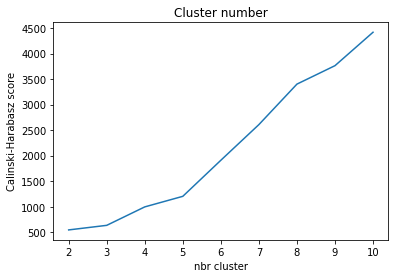

In [18]:
#Clustering
color_name_set,model = kmeans_processing(projections_ero,erosion_small_,dico_tous_les_couleurs,10,False) 

Research interval : 2-20


Calinski-Harabasz score : 100%|██████████| 19/19 [00:00<00:00, 109.95it/s]

optimal cluster: 

 19


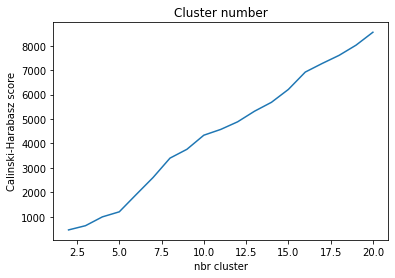

In [19]:
color_name_set,model = HCA_processing(projections_ero,erosion_small_,dico_tous_les_couleurs,20,see_latent_space=False)

In [23]:
see_latent_space = False
zz = np.zeros(points.shape)
points_big_infer, points_small_infer, _, _ = train_test_split(points, zz ,test_size=0.2, random_state=4)

y_clusters_tsne = model.fit_predict(points_small_infer)

color_name_set = []
for ix in y_clusters_tsne:
    nbr = y_clusters_tsne[ix]
    color_name_set.append(dico_tous_les_couleurs[nbr])

viewer = napari.Viewer(ndisplay=3)

if see_latent_space:
    #Color label in latent space
    points_layer = viewer.add_points(
            points_small_infer,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
        )
else:
    #Color label in raw data
    points_layer = viewer.add_points(
            points_small_infer,
            edge_width=0.5,
            size=0.1,
            face_color=color_name_set,
            edge_color=color_name_set
    )

MemoryError: unable to allocate array data.

# 1- Reduction de dimension + clustering

Strategie : 

1- Créer des groupes par une projection des points dans un espace latent

2- Définir ces groupes par une technique de clustering

## TSNE

In [26]:
from sklearn.manifold import TSNE

current_data = points_small

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=500)
projections = tsne.fit_transform(current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    projections,
    edge_width=0.5,
    size=0.1
)

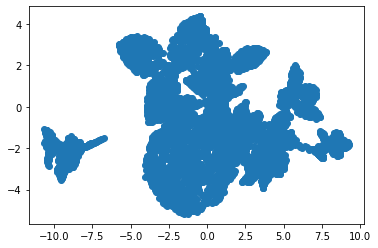

In [27]:
import matplotlib.pyplot as plt
plt.scatter(projections[:,0],projections[:,1])

### Clustering

Research interval : 2-80


Calinski-Harabasz score : 100%|██████████| 79/79 [00:38<00:00,  2.04it/s]


optimal cluster:  79


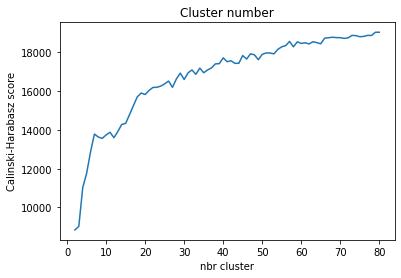

In [215]:
# Kmeans
color_name_set = kmeans_processing(projections,current_data,dico_tous_les_couleurs,80,False) #maximum_range=20 / see_latent_space=False

(6885, 3) 6885


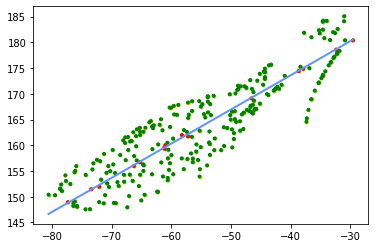

In [204]:
from collections import Counter
from sklearn import linear_model

all_color_in = list(dict(Counter(color_name_set)).keys())
print(current_data.shape,len(color_name_set))
# for i in all_color_in:
i=all_color_in[5]
current_color_data0 = []
current_color_data1 = []
current_color_data2 = []
# np.where(color_name_set==i,current_data[:,0])
for iy in range(len(color_name_set)):
    if color_name_set[iy]==i:
        current_color_data0.append(current_data[:,0][iy])
        current_color_data1.append(current_data[:,1][iy])
        current_color_data2.append(current_data[:,2][iy])
current_color = np.zeros((len(current_color_data0),3))
current_color[:,0]=current_color_data0
current_color[:,1]=current_color_data1
current_color[:,2]=current_color_data2

ransac = linear_model.RANSACRegressor()

X = current_color[:,0:1]
y = current_color[:,2]

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
plt.plot(line_X,line_y_ransac,color="cornflowerblue",linewidth=lw,label="RANSAC regressor")

color_dataset = []
x1 = line_X[0]
x2 = line_X[-1]
y1_2_5 = line_y_ransac[0]-.5
y2_2_5 = line_y_ransac[-1]-.5
y1_up_2_5 = line_y_ransac[0]+.5
y2_up_2_5 = line_y_ransac[-1]+.5

for xA,yA in zip(current_color[:,0:1], current_color[:,2]):    
    v1 = (x2-x1, y2_2_5-y1_2_5)
    v2 = (x2-xA, y2_2_5-yA)     
    v1_ = (x2-x1, y2_up_2_5-y1_up_2_5)
    v2_ = (x2-xA, y2_up_2_5-yA)     
    xp = v1[0]*v2[1] - v1[1]*v2[0]
    xp_ = v1_[0]*v2_[1] - v1_[1]*v2_[0]
    if xp<= 0 and xp_>= 0:
        color_dataset.append("red")
    else:
        color_dataset.append("green")
plt.scatter(
    current_color[:,0:1], current_color[:,2], marker=".", label="Inliers",color=color_dataset
)

Research interval : 2-20


Calinski-Harabasz score : 100%|██████████| 19/19 [00:21<00:00,  1.14s/it]


optimal cluster:  18


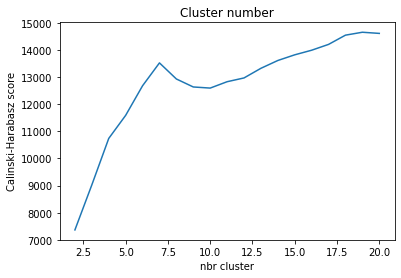

In [209]:
color_name_set = HCA_processing(projections,current_data,dico_tous_les_couleurs,20,see_latent_space=False)

## UMAP

In [210]:
from umap import UMAP

current_data = points_small

umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    proj_3d,
    edge_width=0.5,
    size=0.1
)

### Clustering

Research interval : 2-40


Calinski-Harabasz score : 100%|██████████| 39/39 [00:08<00:00,  4.36it/s]


optimal cluster:  39


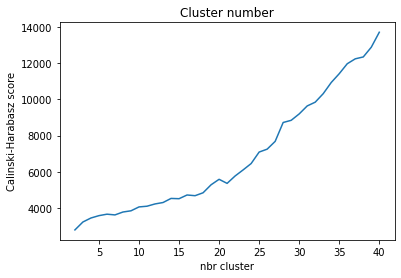

In [237]:
# Kmeans
color_name_set = kmeans_processing(proj_3d,current_data,dico_tous_les_couleurs,40,False) #see_latent_space=False

Research interval : 2-20


Calinski-Harabasz score : 100%|██████████| 19/19 [00:22<00:00,  1.16s/it]


optimal cluster:  19


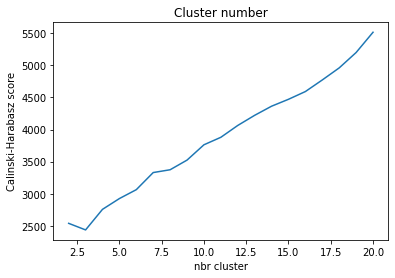

In [127]:
# HCA
HCA_processing(proj_3d,current_data,dico_tous_les_couleurs,20,see_latent_space=False)

## GaussianMixture

In [200]:
from sklearn.mixture import GaussianMixture

current_data = points_small
nbr_cluster = 5

# latent vector = 15: leaf segmentated
gm = GaussianMixture(n_components=3, random_state=0)
gm = gm.fit(current_data)
projection_gm = gm.predict(current_data)

color_vector = np.where(projection_gm==0,'red','green')

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    current_data,
    edge_width=0.5,
    size=0.1,
    face_color=color_vector,
    edge_color=color_vector
)

## KPCA

In [144]:
from sklearn.decomposition import KernelPCA

current_data = points_small
nbr_cluster = 3

kpca_model = KernelPCA(n_components=3, kernel='rbf')
kcpa_ = kpca_model.fit_transform(current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    kcpa_,
    edge_width=0.5,
    size=0.1
)

### Clustering

In [146]:
# Kmeans
kmeans_processing(nbr_cluster,kcpa_,current_data,False) #see_latent_space=False

In [147]:
# HCA
HCA_processing(nbr_cluster,kcpa_,current_data,False)

## Minibatch Kmeans

In [171]:
from sklearn.cluster import MiniBatchKMeans

current_data = points_small
nbr_cluster = 2

mbk  = MiniBatchKMeans(init="k-means++", n_clusters=nbr_cluster, batch_size=45, n_init=10, max_no_improvement=10, verbose=0,)
mbk  = mbk.fit_transform(current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    mbk,
    edge_width=0.5,
    size=0.1
)

In [173]:
# Kmeans
kmeans_processing(nbr_cluster,mbk,current_data,False) #see_latent_space=False

In [174]:
# HCA
HCA_processing(nbr_cluster,mbk,current_data,False)

## Skeletonize

## RANSAC algorithm

In [239]:
current_data = points_small[:,0:2]
nbr_cluster = 3

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    current_data,
    edge_width=0.5,
    size=0.1
)

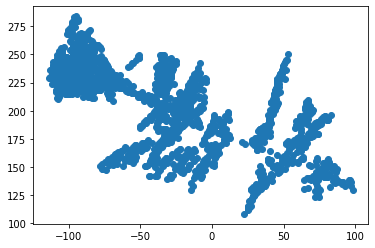

In [240]:
from sklearn import linear_model

# current_data = points_small[:,0:2]
current_data = points_small

zzz = np.zeros(current_data.shape)
points_big_, points_small_, _, _ = train_test_split(current_data, zzz ,test_size=0.3, random_state=4)
X = points_small_[:,0:1]
y = points_small_[:,2]
plt.scatter(X, y)

ransac = linear_model.RANSACRegressor()

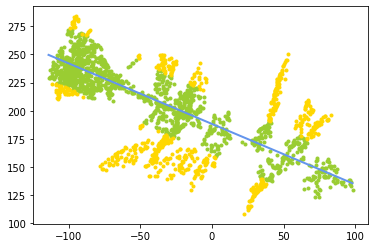

In [258]:
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)

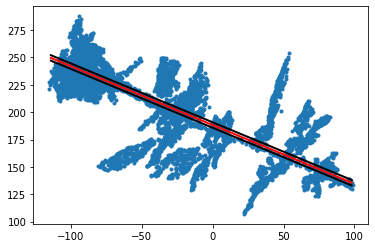

In [259]:
plt.scatter(
    current_data[:,0:1], current_data[:,2], marker=".", label="Inliers"
)
plt.plot(
    line_X,
    line_y_ransac,
    color="red",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.plot(
    line_X,
    line_y_ransac-2.5,
    color="black",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.plot(
    line_X,
    line_y_ransac+2.5,
    color="black",
    linewidth=lw,
    label="RANSAC regressor",
)

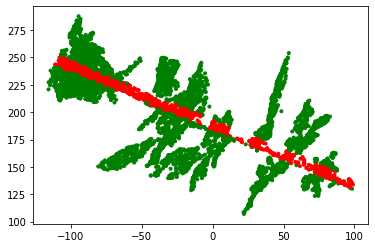

In [260]:
color_dataset = []
x1 = line_X[0]
x2 = line_X[-1]
y1_2_5 = line_y_ransac[0]-5
y2_2_5 = line_y_ransac[-1]-5

y1_up_2_5 = line_y_ransac[0]+5
y2_up_2_5 = line_y_ransac[-1]+5

Line = [[x1,y1_2_5],[x2,y2_2_5]]

for xA,yA in zip(current_data[:,0:1], current_data[:,2]):
    
    v1 = (x2-x1, y2_2_5-y1_2_5)
    v2 = (x2-xA, y2_2_5-yA) 
    
    v1_ = (x2-x1, y2_up_2_5-y1_up_2_5)
    v2_ = (x2-xA, y2_up_2_5-yA) 
    
    xp = v1[0]*v2[1] - v1[1]*v2[0]
    xp_ = v1_[0]*v2_[1] - v1_[1]*v2_[0]
    if xp<= 0 and xp_>= 0:
        color_dataset.append("red")
    else:
        color_dataset.append("green")
plt.scatter(
    current_data[:,0:1], current_data[:,2], marker=".", label="Inliers",color=color_dataset
)

In [261]:
# FINAL
viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    current_data,
    edge_width=0.5,
    size=0.1,
    face_color=color_dataset,
    edge_color=color_dataset,
)

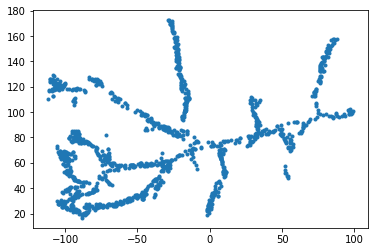

In [153]:
new_current_data0 = []
new_current_data1 = []
new_current_data2 = []
for ix in range(len(color_dataset)):
    if color_dataset[ix]=="red":
        new_current_data0.append(current_data[:,0][ix])
        new_current_data1.append(current_data[:,1][ix])
        new_current_data2.append(current_data[:,2][ix])
new_current_data = np.zeros((len(new_current_data0),3))

new_current_data[:,0]=new_current_data0
new_current_data[:,1]=new_current_data1
new_current_data[:,2]=new_current_data2

plt.scatter(
    new_current_data[:,0], new_current_data[:,1], marker=".", label="Inliers"
)

In [157]:
from sklearn.manifold import TSNE

current_data = points_small

tsne_ncd = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=500)
projections_new_current_data = tsne_ncd.fit_transform(new_current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    projections_new_current_data,
    edge_width=0.5,
    size=0.1
)

Research interval : 2-20


Calinski-Harabasz score : 100%|██████████| 19/19 [00:02<00:00,  8.47it/s]


optimal cluster:  19


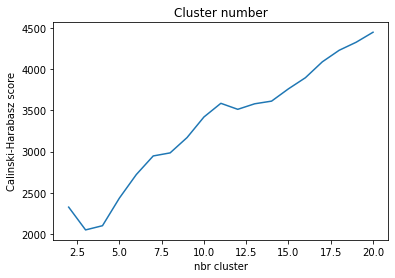

In [158]:
kmeans_processing(projections_new_current_data,new_current_data,dico_tous_les_couleurs,20,False) #see_latent_space=False

## ICA

In [149]:
from sklearn.decomposition import FastICA

current_data = points_small
nbr_cluster = 3

transformer = FastICA(n_components=3, random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(current_data)

viewer = napari.Viewer(ndisplay=3)
points_layer = viewer.add_points(
    X_transformed,
    edge_width=0.5,
    size=0.1
)

### Clustering

In [150]:
# Kmeans
kmeans_processing(nbr_cluster,X_transformed,current_data,False) #see_latent_space=False

In [151]:
# HCA
HCA_processing(nbr_cluster,X_transformed,current_data,False)

# 2 - Probability Density Estimation + Clustering